In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---
# Car project Group 5
Group 5 Members:
-  Gabriel Rodriguez
-  Qi Zhang
-  Caitlin Klukas
-  Mugdha Dixit
---
# Overall data set summary

In [3]:
df_cars = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df_cars["make"] = df_cars.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df_cars.columns
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   make           4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [73]:
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


---
# Selling price
---

In [4]:
#get selling price information
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_cars.selling_price.describe()

count      4340.00
mean     504127.31
std      578548.74
min       20000.00
25%      208749.75
50%      350000.00
75%      600000.00
max     8900000.00
Name: selling_price, dtype: float64

<AxesSubplot:xlabel='selling_price'>

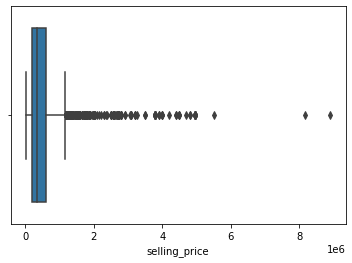

In [5]:
#ensure selling price column type to be int
df_cars['selling_price'] = pd.to_numeric(df_cars['selling_price'])

#box plot
sns.boxplot(df_cars.selling_price)

<AxesSubplot:>

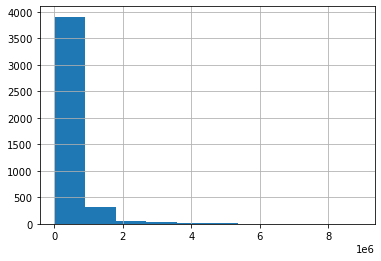

In [6]:
#plot out data
df_cars['selling_price'].hist()

In [7]:
#clean data and obtain outliers
q3 = np.quantile(df_cars.selling_price, 0.75)
q1 = np.quantile(df_cars.selling_price, 0.25)
iqr = q3 - q1

#find lower / upper limits
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#filter out and only keep values within range 
not_outliers = [x for x in df_cars.selling_price if (
    (x > lower) & (x < upper))]
filtered_cars = df_cars.loc[df_cars.selling_price.isin(not_outliers)]

display(filtered_cars)

#obtain outlier values
outliers = df_cars.loc[~df_cars.selling_price.isin(not_outliers)]
display(outliers)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner,Toyota
25,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner,Toyota
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner,Hyundai
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...
4224,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000,Petrol,Individual,Automatic,Second Owner,Toyota
4228,Mahindra XUV500 W10 AWD,2015,1225000,70000,Diesel,Individual,Manual,First Owner,Mahindra
4304,Audi Q5 3.0 TDI Quattro Technology,2018,3899000,22000,Diesel,Dealer,Automatic,First Owner,Audi
4311,Toyota Camry Hybrid 2.5,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner,Toyota


In [8]:
filtered_cars.selling_price.describe()

count      4069.00
mean     392378.60
std      248112.81
min       20000.00
25%      200000.00
50%      340000.00
75%      550000.00
max     1165000.00
Name: selling_price, dtype: float64

### Box plot
- mean = $392,378.60

- min = $20,000.00

- max = $1,165,000.00

- Q1 = $208,749.75

- Q3 = $600,000.00

- IQR = $391,250.25

- Lower = $20,000.00

- Upper = $1,165,000.00

<AxesSubplot:xlabel='selling_price'>

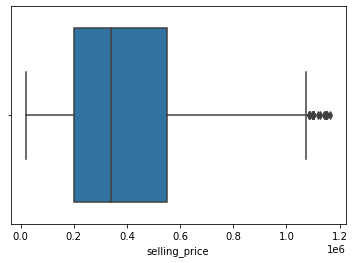

In [9]:
#ensure selling price column type to be int
filtered_cars['selling_price'] = pd.to_numeric(filtered_cars['selling_price'])

#box plot
sns.boxplot(filtered_cars.selling_price)

<AxesSubplot:>

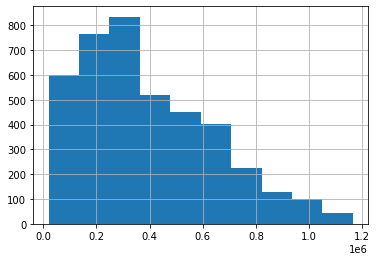

In [10]:
#plot out data
filtered_cars['selling_price'].hist()

### Center of data (mean/average)

- The center or mean of the data is $392,378.60

In [11]:
#describe the center of data (mean / average)
av = float(filtered_cars.selling_price.describe().loc[['mean']])
av = round(av,2)

print('The center or mean of the data is ${}'.format(av))

The center or mean of the data is $392378.6


### Spread of data

- Q1 is $208,749.75

- Q3 is $600,000.00

- IQR is $391,250.25

- Min is $20,000.00

- Max is $1,165,000.00

- Range is $1,145,000.00

In [12]:
#describe the spread of data 
min_ = float(filtered_cars.selling_price.describe().loc[['min']])
min_ = round(min_,2)

max_ = float(filtered_cars.selling_price.describe().loc[['max']])
max_ = round(max_,2)

print("Q1 is ${}, Q3 is ${}, IQR is ${}, Min is ${}, Max is ${}, Range is ${}".format(q1, q3, iqr, min_, max_, (max_-min_)))

Q1 is $208749.75, Q3 is $600000.0, IQR is $391250.25, Min is $20000.0, Max is $1165000.0, Range is $1145000.0


### Skew of data
- The skew of the filtered ata is right skewed distribution

In [13]:
#describe the skew of data
print('The skew of the filtered car data is right skewed distribution')

The skew of the filtered car data is right skewed distribution


### Cluster / Modality of data
- Since there is only one peak or mode, the modality of can be described as Unimodal

In [14]:
#describe clusters/modality 
samples = filtered_cars.selling_price.sample(4)

samples

3963    390000
1969    200000
3510    380000
3083    359000
Name: selling_price, dtype: int64

In [15]:
#describe modality 
print('Since there is only one peak or mode, the modality can be described as Unimodal')

Since there is only one peak or mode, the modality can be described as Unimodal


### Extreme values in data
#### In the outliers list:
- min values is $1189000.00

- max value is $8900000.00

- range of $7711000.00

In [16]:
#describe extreme values
df_outliers = outliers

df_outliers.selling_price.describe()

mi_ = float(df_outliers.selling_price.describe().loc[['min']])
mi_ = round(mi_,2)

ma_ = float(df_outliers.selling_price.describe().loc[['max']])
ma_ = round(ma_,2)


print('In the outliers list, the min values is ${}, while the max value is ${}, with a range of ${}'.format(mi_, ma_,(ma_-mi_)))

In the outliers list, the min values is $1189000.0, while the max value is $8900000.0, with a range of $7711000.0


---
# Year Analysis
 

In [17]:
year_summary = df_cars.year.describe()
year_summary

count   4340.00
mean    2013.09
std        4.22
min     1992.00
25%     2011.00
50%     2014.00
75%     2016.00
max     2020.00
Name: year, dtype: float64

### Center 
- From the describe() function we can get the info of the year's mean, min, max, std.
mean = 2013, min = 1992, max = 2020
this is telling us, the dataset year range is from 1992 to 2020, the average of the data year is 2013


<AxesSubplot:xlabel='year'>

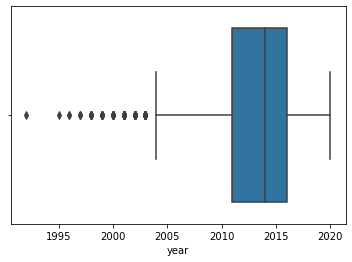

In [18]:
#box plot
sns.boxplot(df_cars.year)

In [19]:
q3 = np.quantile(df_cars.year, 0.75)
q1 = np.quantile(df_cars.year, 0.25)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower, upper, iqr,q1,q3)

2003.5 2023.5 5.0 2011.0 2016.0


### Spread

- mean = 2013, min = 1992, max = 2020, the dataset year range is from 1992 to 2020, the avgerage of the data year is 2013
- Q1 = 2011
- Q3 = 2016
- IQR = 2016 - 2011 = 5 (Interqurtile range)
- Lower = Q1 -1.5 * IQR = 2003.5
- Upper = Q3 +1.5* IQR =2023.5 
- However, the upper 2023.5 is over the MAX year = 2020 so the box plot shows upper = 2020

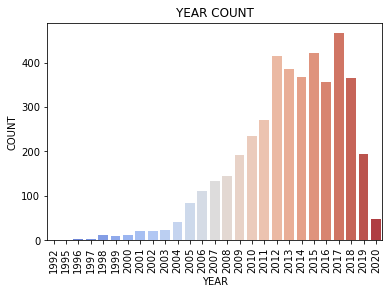

In [43]:
# Histgram
sns.countplot(data=df_cars,x="year",palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10)
plt.ylabel("COUNT",fontsize=10)
plt.title("YEAR COUNT")
plt.show()

In [25]:
year_mean = df_cars['year'].mean()
year_median = df_cars['year'].median()
year_mode = df_cars['year'].mode()
print('the mean of the year is {0:.2f}, the median of the year is {1}, the mode of the year is {2}'
      .format(year_mean,year_median,int(year_mode[0])))


the mean of the year is 2013.09, the median of the year is 2014.0, the mode of the year is 2017


In [26]:
import numpy as np
from scipy.stats import skew
skewness = skew(df_cars.year)

if skewness > 0:
    skew_description = "Positively skewed"
elif skewness < 0:
    skew_description = "Negatively skewed"
else:
    skew_description = "Symmetric"

print(f"Skewness: {skewness:.2f} ({skew_description})")

Skewness: -0.83 (Negatively skewed)


###  Skew & Clusters/Modality
- Since the mean < median < mode, this is a left skewed distribution (negative skewed)
- Unimodal: One clear peak in the histogram.

###  Extreme value

In [28]:
extreme_values = [x for x in df_cars.year if x < lower or x > upper]
print("Extreme Values:", set(extreme_values)) #Drop dup

Extreme Values: {1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003}


In [97]:
filtered_cars = df_cars.loc[~df_cars.year.isin(extreme_values)]# Remove extreme value
filtered_cars.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
Name: year, dtype: int64

### Additional Analysis
- From the Pie chart we can easily see year 2017 is best selling year 
- From this sunburn chart, we can see Maruti is the most popular car in every year. and most cars are manual.

In [96]:
year_counts = filtered_cars.groupby(['year'])['year'].count()

# Calculate the percentage
total_count = year_counts.sum()
year_percentage = (year_counts / total_count) * 100

# Creating a DataFrame to display results
result = pd.DataFrame({'year': year_counts.index, 'Count': year_counts, 'Percentage': year_percentage}).reset_index(drop=True)
result_sorted = result.sort_values(by='Count', ascending=False)
result_sorted

,year,Count,Percentage
13,2017,466,11.00
11,2015,421,9.94
8,2012,415,9.80
9,2013,386,9.11
10,2014,367,8.67
14,2018,366,8.64
12,2016,357,8.43
7,2011,271,6.40
6,2010,234,5.53
15,2019,195,4.60


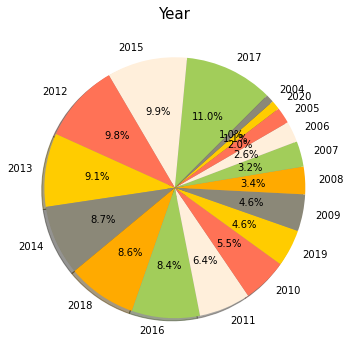

In [52]:
labels = filtered_cars["year"].value_counts().index # get the selling year count most popular 50 
sizes = filtered_cars["year"].value_counts()
colors = ["#A2CD5A", "#FFEFDB", "#FF7256", "#FFCC00", "#8B8878", "#FFAA00"]
#     ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'black',fontsize = 15)
plt.show()

In [76]:
joint_data=df_cars.sort_values(by='year', ascending=False)

top_cars=joint_data[:3000]
fig =px.sunburst(
    top_cars,
    path=['year',"make","transmission"],
    values='year',
    color='year')
fig.show()

# Kilometers Driven

In [53]:
# There are no null values for km_driven in this dataset
df_cars.loc[df_cars.km_driven.isnull() == True].count()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
make             0
dtype: int64

In [54]:
df_cars.km_driven.describe()

count     4340.00
mean     66215.78
std      46644.10
min          1.00
25%      35000.00
50%      60000.00
75%      90000.00
max     806599.00
Name: km_driven, dtype: float64

In [55]:
mean_km = df_cars.km_driven.mean()
median_km = df_cars.km_driven.median()
mode_km = df_cars.km_driven.mode()
print("mean = ", mean_km)
print("median = ", median_km)
print("mode = ", mode_km)

mean =  66215.77741935484
median =  60000.0
mode =  0    70000
Name: km_driven, dtype: int64


### Spread
 - Min = 1km, Max = 806599 with a range of 806598km
 - The data is grouped more tightly in the lower range with greater spread in the upper range, as indicated by a larger gap between Q3 and the upper whisker bound compared with Q1 and the lower whisker bound
 - 110 (or ~2.5%) of all cars could be considered outliers with km driven above the upper whisker bound of 172500km
 - Mahindra's represent nearly 1/3 (27%) of all cars above the upper whisker bound compared to 8% of all cars in the dataset

In [56]:
min_km = df_cars.km_driven.min()
max_km = df_cars.km_driven.max()
range_km = max_km - min_km

print("min = ", min_km)
print("max = ", max_km)
print("range = ", range_km)

min =  1
max =  806599
range =  806598


<AxesSubplot:xlabel='km_driven'>

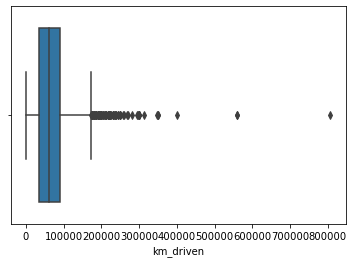

In [57]:
sns.boxplot(x=df_cars["km_driven"])

<AxesSubplot:>

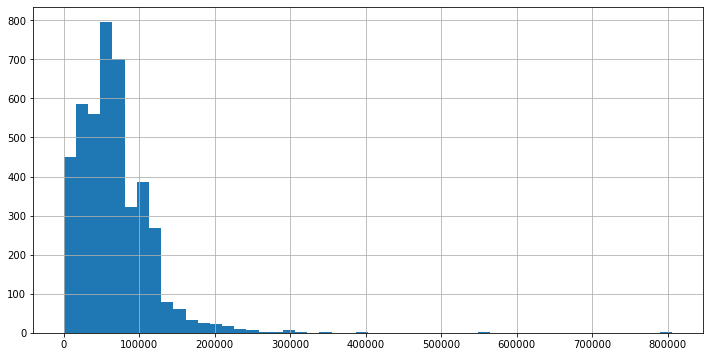

In [58]:
df_cars.km_driven.hist(figsize=(12, 6), bins=50)

In [61]:
q3_km = np.quantile(df_cars.km_driven, 0.75)
q1_km = np.quantile(df_cars.km_driven, 0.25)
iqr_km = q3_km - q1_km

lowerWB = q1_km - 1.5 * iqr_km
upperWB = q3_km + 1.5 * iqr_km
print("IQR = ", iqr_km)
print("3rd Quartile = ", q3_km)
print("1st Quartile = ", q1_km)
print("lower km bound = ", lowerWB)
print("upper km bound = ", upperWB)

IQR =  55000.0
3rd Quartile =  90000.0
1st Quartile =  35000.0
lower km bound =  -47500.0
upper km bound =  172500.0


In [60]:
outliers = df_cars.km_driven.loc[df_cars.km_driven > upperWB]
print("# cars above uwb = ", outliers.count())
print("percentage of outliers = ", 110/4340)
print()

outliers = df_cars.loc[df_cars.km_driven > upperWB]
mahindra = df_cars.loc[df_cars.make == "Mahindra"]
print("Total # Mahindra = ", mahindra.shape[0])
print(mahindra.shape[0]/4340)
print()

mahindra_in_outliers = outliers.loc[df_cars.make == "Mahindra"]
print("# Mahindra in outlisers = ", mahindra_in_outliers.shape[0])
print(mahindra_in_outliers.shape[0]/110)

# cars above uwb =  110
percentage of outliers =  0.02534562211981567

Total # Mahindra =  365
0.08410138248847926

# Mahindra in outlisers =  30
0.2727272727272727


### Boxplot - with outliers removed

<AxesSubplot:xlabel='km_driven'>

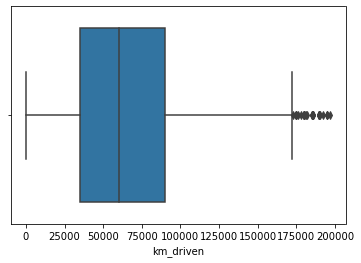

In [62]:
km_no_outliers = df_cars.km_driven.loc[df_cars.km_driven < 200000]
sns.boxplot(km_no_outliers)

### Modality & Clusters
 - As discussed above, 50% of the data is grouped between 35000-90000km as indicated by the 1st and 3rd quartiles.
 - When extreme values are filtered from the dataset, it demonstrates a fairly unimodal distribution.

<AxesSubplot:>

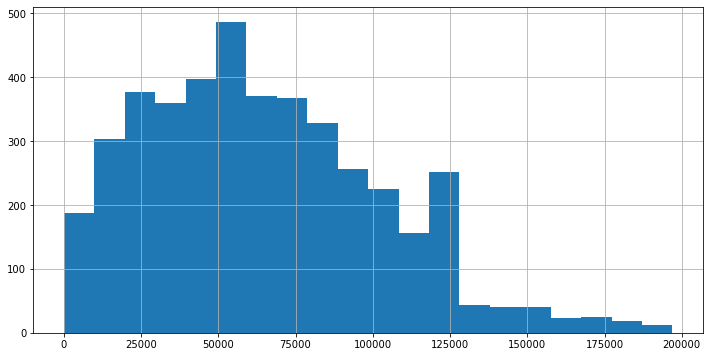

In [63]:
km_no_outliers.hist(figsize=(12, 6), bins=20)

### Additional Analysis
 - With km driven separated by car make, we see that some car types (Ex. Datsun and Jeep) have a lower average km driven with much less spread. Mitsubishis, on the other hand, have a much higher km_driven on average than the rest of the data set. 

In [64]:
df_km = df_cars.loc[df_cars.km_driven < 200000]
df_km.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'make'],
      dtype='object')

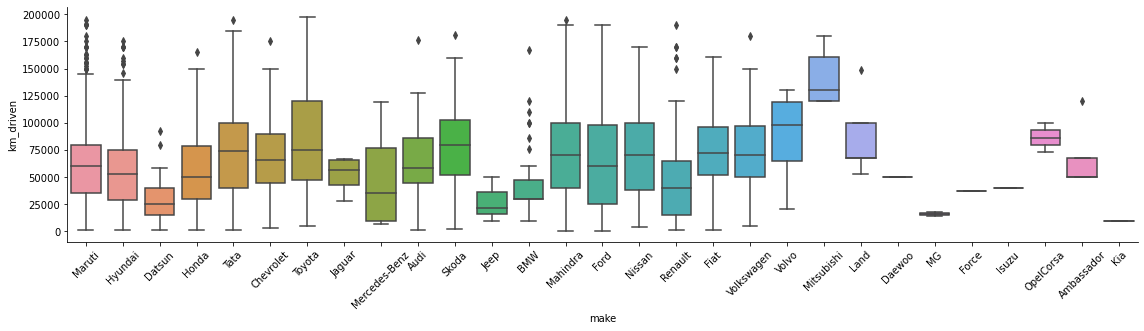

In [65]:
plot = sns.catplot(data=df_km, x='make', y='km_driven', kind="box", height=4, aspect=4.0)
plot.set_xticklabels(rotation=45)
plot

#with sns.axes_style("whitegrid"):
    #sns.catplot(data=df_km, x='make', y='km_driven', kind="box", height=4, aspect=4.0)

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [17]:
df_cars.make.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: make, dtype: int64

From the graph, we can see that the most common car brand is Maruti, and the least commons are: Daewoo, Force, Isuzu, and Kia. These cars are mostly foreigns car, so it might not be common in the US.


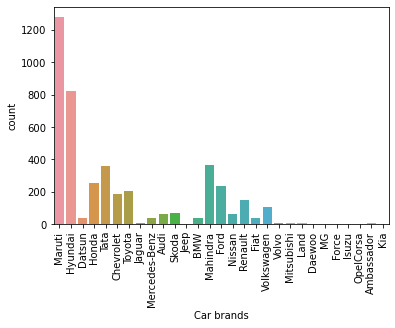

In [16]:
# Highest count of car's brand
sns.countplot(data=df_cars,x="make")
plt.xticks(rotation = 90)
plt.xlabel("Car brands")
print("From the graph, we can see that the most common car brand is Maruti, and the least commons are: Daewoo, Force, Isuzu, and Kia. These cars are mostly foreigns car, so it might not be common in the US.")

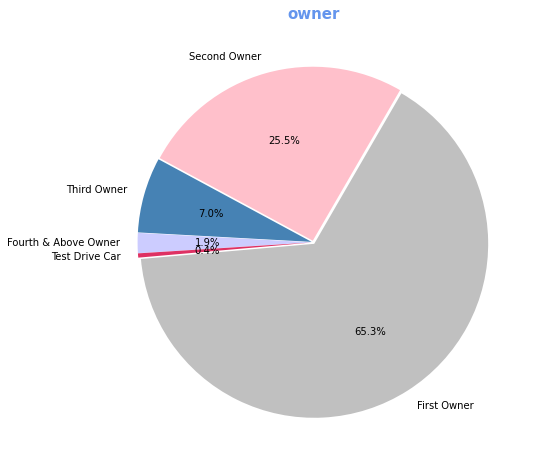


The pie chart showed us that First owner cars make up the largest share, accounting for 65.3% of the market. second owner occupied 25.5%, the Third Owner and rest are less than 10%


In [14]:
label = df_cars["owner"].value_counts().index
size = df_cars["owner"].value_counts()
color = ['silver', 'pink', 'steelblue','#CCCCFF','#DE3163']

plt.figure(figsize = (8,8))
plt.pie(size, labels=label, rotatelabels=False, autopct='%1.01f%%',explode=explode,colors=color,shadow=False, startangle=905)
plt.title('owner',fontdict={'size':15, 'weight':'bold', 'color':'#6495ED'})
plt.show()

print()
print("The pie chart showed us that First owner cars make up the largest share, accounting for 65.3% of the market. second owner occupied 25.5%, the Third Owner and rest are less than 10%")